In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(0)

In [ ]:
data=pd.read_csv("genre_dataset.csv")
data.head(2)

,par_id,paragraph,has_entity,lexicon_count,difficult_words,last_editor_gender,category,text_clarity
0,428209002237,Ramsay was born in Glasgow on 2 October 1852. ...,ORG_YES_PRODUCT_NO_PERSON_YES_,49,12.0,man,biographies,clear_enough
1,564218010072,It has been widely estimated for at least the ...,ORG_YES_PRODUCT_NO_PERSON_NO_,166,47.0,man,artificial intelligence,not_clear_enough


In [ ]:
import pandas as pd

dataset_description = data.describe(include='all')

missing_data = data.isnull().sum()

print(dataset_description, missing_data)


              par_id paragraph                      has_entity  lexicon_count  \
count   9.347000e+03      9347                            9347    9347.000000   
unique           NaN      8992                               9            NaN   
top              NaN        -1  ORG_YES_PRODUCT_NO_PERSON_YES_            NaN   
freq             NaN        42                            3060            NaN   
mean    3.568369e+11       NaN                             NaN      81.981277   
std     3.221399e+11       NaN                             NaN      63.533532   
min     8.500328e+07       NaN                             NaN       0.000000   
25%     7.019601e+10       NaN                             NaN      33.000000   
50%     2.684380e+11       NaN                             NaN      64.000000   
75%     6.124310e+11       NaN                             NaN     117.000000   
max     1.058779e+12       NaN                             NaN     653.000000   

        difficult_words las

In [ ]:
print("Duplicated Values:",data.duplicated().sum())

Duplicated Values: 215


In [ ]:
data["category"].value_counts()

biographies                             2942
philosophy                              2585
programming                             1980
artificial intelligence                 1565
movies about artificial intelligence     166
Philosophy                                13
Biographies                               13
Artificial intelligence                   11
Programming                               10
Movies about artificial intelligence       1
Name: category, dtype: int64

Counts of each category in 'has_entity':
 ORG_YES_PRODUCT_NO_PERSON_YES_     3060
ORG_NO_PRODUCT_NO_PERSON_NO_       2874
ORG_YES_PRODUCT_NO_PERSON_NO_      1474
ORG_NO_PRODUCT_NO_PERSON_YES_      1382
ORG_YES_PRODUCT_YES_PERSON_YES_     299
ORG_YES_PRODUCT_YES_PERSON_NO_      127
ORG_NO_PRODUCT_YES_PERSON_YES_       65
ORG_NO_PRODUCT_YES_PERSON_NO_        42
data missing                         24
Name: has_entity, dtype: int64

Percentage of each category in 'has_entity':
 ORG_YES_PRODUCT_NO_PERSON_YES_     32.737777
ORG_NO_PRODUCT_NO_PERSON_NO_       30.747834
ORG_YES_PRODUCT_NO_PERSON_NO_      15.769766
ORG_NO_PRODUCT_NO_PERSON_YES_      14.785493
ORG_YES_PRODUCT_YES_PERSON_YES_     3.198887
ORG_YES_PRODUCT_YES_PERSON_NO_      1.358725
ORG_NO_PRODUCT_YES_PERSON_YES_      0.695410
ORG_NO_PRODUCT_YES_PERSON_NO_       0.449342
data missing                        0.256767
Name: has_entity, dtype: float64


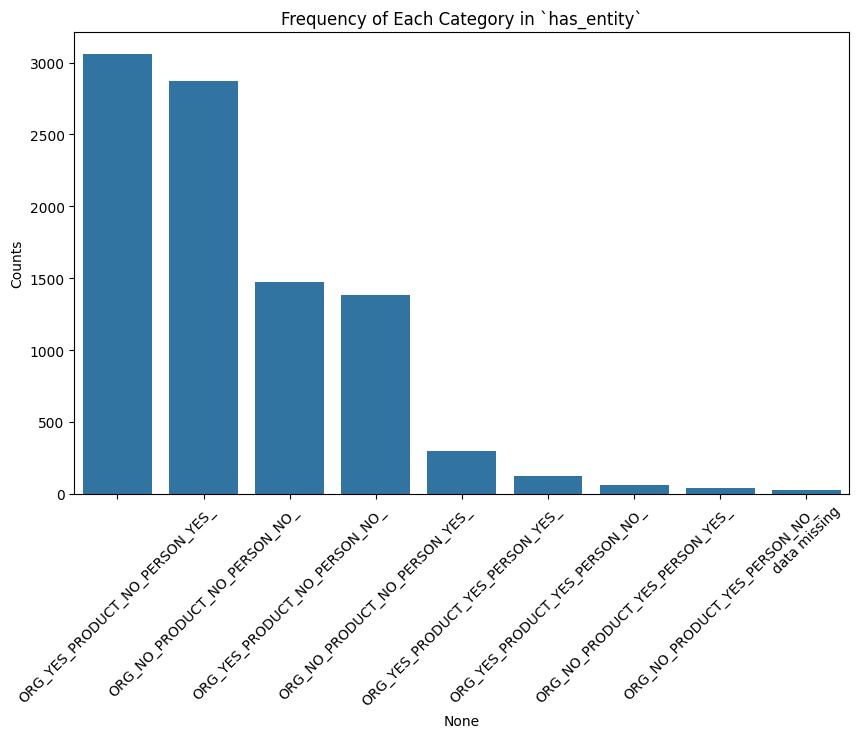


Categories considered as outliers: ['ORG_NO_PRODUCT_YES_PERSON_YES_', 'ORG_NO_PRODUCT_YES_PERSON_NO_', 'data missing']


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


entity_counts = data['has_entity'].value_counts()
print("Counts of each category in 'has_entity':\n", entity_counts)

# Percentage analysis
entity_percentages = data['has_entity'].value_counts(normalize=True) * 100
print("\nPercentage of each category in 'has_entity':\n", entity_percentages)

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=entity_counts.index, y=entity_counts.values)
plt.title('Frequency of Each Category in `has_entity`')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.show()

outlier_threshold = 1
outlier_categories = entity_percentages[entity_percentages < outlier_threshold].index.tolist()
print("\nCategories considered as outliers:", outlier_categories)


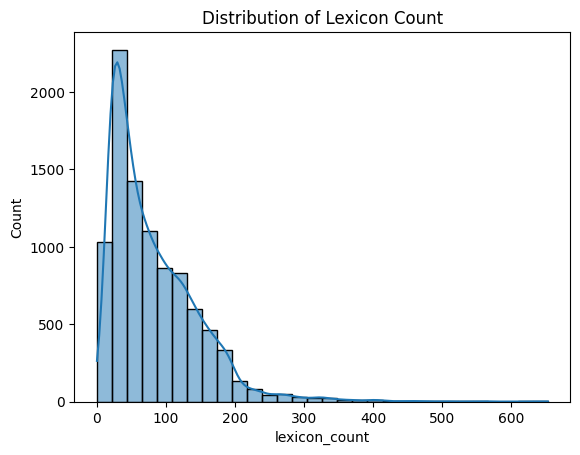

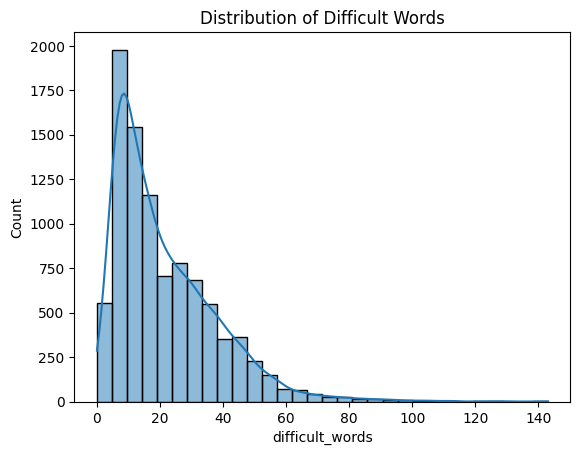

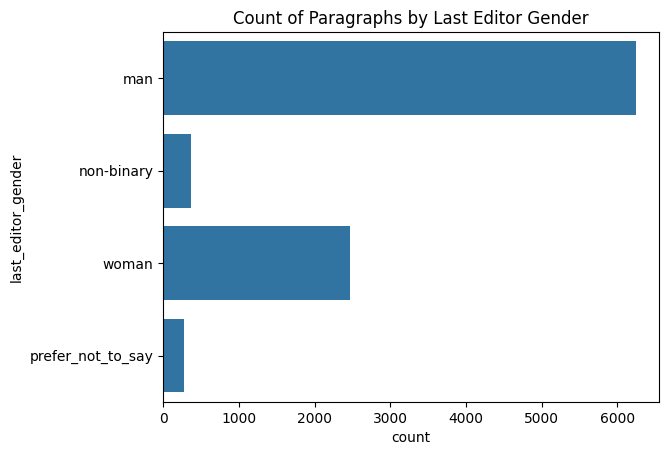

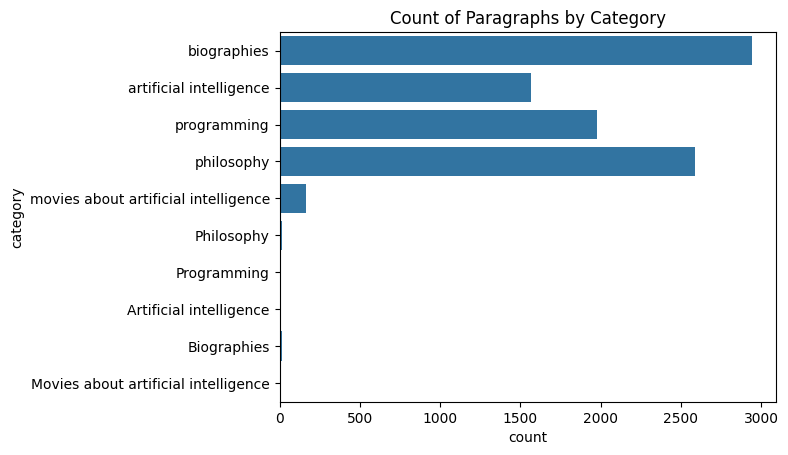

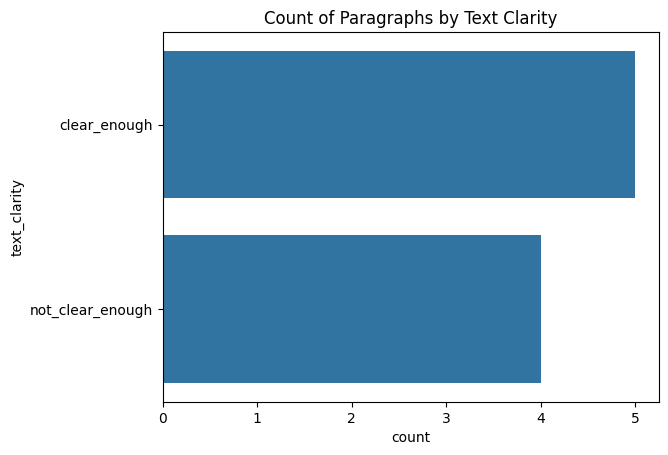

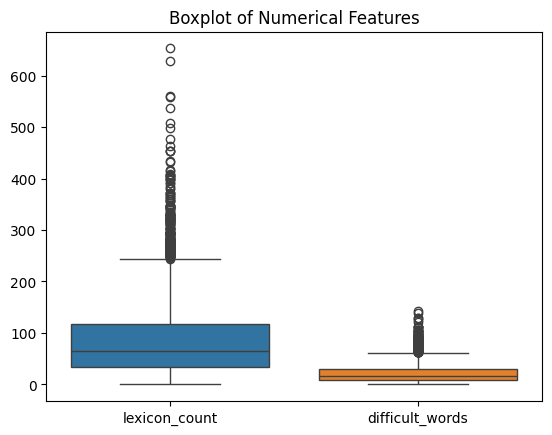

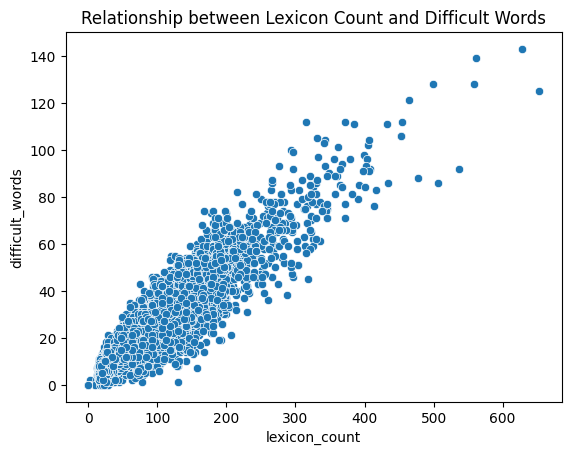

                 lexicon_count  difficult_words
lexicon_count         1.000000         0.923883
difficult_words       0.923883         1.000000


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


sns.histplot(data['lexicon_count'], bins=30, kde=True)
plt.title('Distribution of Lexicon Count')
plt.show()

sns.histplot(data['difficult_words'].dropna(), bins=30, kde=True)
plt.title('Distribution of Difficult Words')
plt.show()

# Counts of categorical features
sns.countplot(y=data['last_editor_gender'])
plt.title('Count of Paragraphs by Last Editor Gender')
plt.show()

sns.countplot(y=data['category'])
plt.title('Count of Paragraphs by Category')
plt.show()

sns.countplot(y=data['text_clarity'])
plt.title('Count of Paragraphs by Text Clarity')
plt.show()

# Boxplot of numerical features
sns.boxplot(data=data[['lexicon_count', 'difficult_words']])
plt.title('Boxplot of Numerical Features')
plt.show()

# Scatter plot for relationship between lexicon count and difficult words
sns.scatterplot(x='lexicon_count', y='difficult_words', data=data)
plt.title('Relationship between Lexicon Count and Difficult Words')
plt.show()

# Correlation matrix
print(data[['lexicon_count', 'difficult_words']].corr())


In [ ]:
!pip install --upgrade spacy
!python -m spacy download en_core_web_md
!pip install clean-text
!pip install nltk


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 18.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 6.2 MB/s eta 0:00:00
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171034 sha256=f27625b99a633a179827a353dca0c18e0c7f3248691f163f8c3ba99304c36abc
  Stored in directory: /root/.cache/pip/wheels/31/8a/8c/315c9e5d7773f74b33d5ed33f075b49c6eaeb7cedbb86e2cf8
Successfully built emoji


<ipython-input-9-01c5c8eeeffc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['category']=df["category"].str.lower()


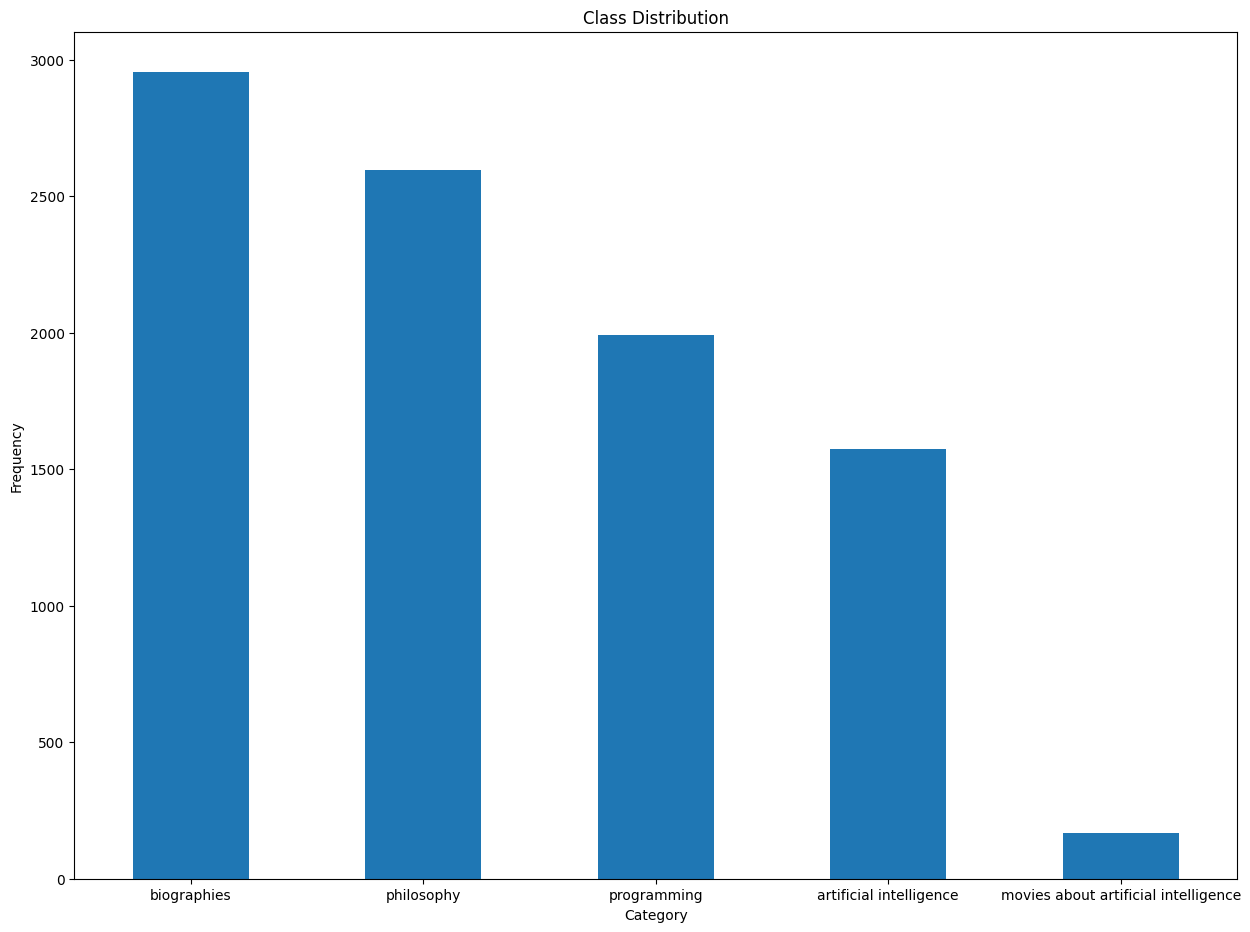

In [ ]:
df=data[["paragraph","has_entity","category"]]
df['category']=df["category"].str.lower()
df.head(5)
class_counts = df['category'].value_counts()

plt.figure(figsize=(15, 11))
class_counts.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

In [ ]:
missing_values = df.isnull().sum()

print(missing_values)
df=df.dropna()

paragraph      0
has_entity     0
category      61
dtype: int64


In [ ]:
print(df.has_entity.value_counts())
print(df.category.value_counts())

ORG_YES_PRODUCT_NO_PERSON_YES_     3038
ORG_NO_PRODUCT_NO_PERSON_NO_       2856
ORG_YES_PRODUCT_NO_PERSON_NO_      1465
ORG_NO_PRODUCT_NO_PERSON_YES_      1374
ORG_YES_PRODUCT_YES_PERSON_YES_     298
ORG_YES_PRODUCT_YES_PERSON_NO_      125
ORG_NO_PRODUCT_YES_PERSON_YES_       64
ORG_NO_PRODUCT_YES_PERSON_NO_        42
data missing                         24
Name: has_entity, dtype: int64
biographies                             2955
philosophy                              2598
programming                             1990
artificial intelligence                 1576
movies about artificial intelligence     167
Name: category, dtype: int64


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['has_entity'] = label_encoder.fit_transform(df['has_entity'])


encoded_classes = label_encoder.classes_
label_mapping = {i: label for i, label in enumerate(encoded_classes)}


print("Label encoding mapping (Encoded value : Original label):")
for encoded_value, original_label in label_mapping.items():
    print(f"{encoded_value} : {original_label}")


Label encoding mapping (Encoded value : Original label):
0 : ORG_NO_PRODUCT_NO_PERSON_NO_
1 : ORG_NO_PRODUCT_NO_PERSON_YES_
2 : ORG_NO_PRODUCT_YES_PERSON_NO_
3 : ORG_NO_PRODUCT_YES_PERSON_YES_
4 : ORG_YES_PRODUCT_NO_PERSON_NO_
5 : ORG_YES_PRODUCT_NO_PERSON_YES_
6 : ORG_YES_PRODUCT_YES_PERSON_NO_
7 : ORG_YES_PRODUCT_YES_PERSON_YES_
8 : data missing


In [ ]:
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()

df['category'] = label_encoder.fit_transform(df['category'])


encoded_classes = label_encoder.classes_

label_mapping = {i: label for i, label in enumerate(encoded_classes)}

print("Label encoding mapping (Encoded value : Original label):")
for encoded_value, original_label in label_mapping.items():
    print(f"{encoded_value} : {original_label}")


Label encoding mapping (Encoded value : Original label):
0 : artificial intelligence
1 : biographies
2 : movies about artificial intelligence
3 : philosophy
4 : programming


In [ ]:
from cleantext import clean

def clean_text(x):
  return clean(x,
    fix_unicode=True,               # fix various unicode errors
    lower=True,                     # change all text to lowercase
    no_line_breaks=True,           # this removes occurrences of the newline character "\n"
    no_punct=False,                 # let's NOT remove punctuations for the time being
    no_urls=True,                  # replace all URLs with a special token (below)
    replace_with_url="",          # we decide to replace urls with nothing
    no_emails=True,                # replace all email addresses with a special token
    replace_with_email="",        # we decide to replace emails with nothing
    no_phone_numbers=True,         # replace all phone numbers with a special token
    replace_with_phone_number="",   # we decide to replace phone numbers with nothing
    lang="en"                       # set to 'de' for German special handling
    )

In [ ]:
df["clean_text"]=df['paragraph'].apply(clean_text)

In [ ]:
import spacy
nlp = spacy.load('en_core_web_md')

In [ ]:
def process_text(text):
    doc = nlp(text)
    cleaned_list = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct and not token.is_space]
    cleaned_text = ' '.join(cleaned_list)
    return cleaned_text

In [ ]:
df['clean_text'] = df['clean_text'].apply(process_text)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[['clean_text', 'has_entity']],
                                                    df['category'],
                                                    test_size=0.2,
                                                    random_state=42)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()


X_train_tfidf = tfidf_vectorizer.fit_transform(X_train['clean_text'])


X_test_tfidf = tfidf_vectorizer.transform(X_test['clean_text'])


In [ ]:
import scipy.sparse as sp


X_train_combined = sp.hstack((X_train_tfidf, X_train['has_entity'].values[:, None]), format='csr')
X_test_combined = sp.hstack((X_test_tfidf, X_test['has_entity'].values[:, None]), format='csr')


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score


model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)

# Fit the model on the training data
model.fit(X_train_combined, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test_combined)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.933799784714747
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.89      0.92       305
           1       0.92      0.95      0.94       622
           2       1.00      0.67      0.80        30
           3       0.90      0.93      0.92       500
           4       0.98      0.96      0.97       401

    accuracy                           0.93      1858
   macro avg       0.95      0.88      0.91      1858
weighted avg       0.93      0.93      0.93      1858



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


model = RandomForestClassifier()
model.fit(X_train_combined, y_train)


y_pred = model.predict(X_test_combined)

print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.78      0.84       305
           1       0.91      0.89      0.90       622
           2       0.94      0.53      0.68        30
           3       0.83      0.91      0.87       500
           4       0.91      0.96      0.93       401

    accuracy                           0.88      1858
   macro avg       0.90      0.81      0.84      1858
weighted avg       0.89      0.88      0.88      1858



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report


model = GradientBoostingClassifier()
model.fit(X_train_combined, y_train)

y_pred = model.predict(X_test_combined)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.74      0.82       305
           1       0.82      0.91      0.86       622
           2       0.86      0.83      0.85        30
           3       0.82      0.87      0.84       500
           4       0.94      0.86      0.90       401

    accuracy                           0.86      1858
   macro avg       0.87      0.84      0.85      1858
weighted avg       0.86      0.86      0.86      1858



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
import scipy.sparse as sp

X_train, X_test, y_train, y_test = train_test_split(
    df[['clean_text', 'has_entity']],
    df['category'],
    test_size=0.2,
    random_state=42
)


tfidf_vectorizer = TfidfVectorizer()


preprocessor = ColumnTransformer(
    transformers=[
        ('text', tfidf_vectorizer, 'clean_text'),
        ('pass', 'passthrough', ['has_entity'])
    ]
)


svm = SVC(kernel='linear')


clf = make_pipeline(preprocessor, svm)


clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)


print("SVM Classification Report:")
print(classification_report(y_test, y_pred))


SVM Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       305
           1       0.95      0.96      0.95       622
           2       1.00      0.87      0.93        30
           3       0.93      0.94      0.93       500
           4       0.98      0.98      0.98       401

    accuracy                           0.95      1858
   macro avg       0.96      0.93      0.94      1858
weighted avg       0.95      0.95      0.95      1858



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer


X_train, X_test, y_train, y_test = train_test_split(
    df[['clean_text', 'has_entity']],
    df['category'],
    test_size=0.2,
    random_state=42
)


tfidf_vectorizer = TfidfVectorizer()
preprocessor = ColumnTransformer(
    transformers=[
        ('text', tfidf_vectorizer, 'clean_text'),
        ('pass', 'passthrough', ['has_entity'])
    ]
)


svm = SVC(kernel='linear')


pipeline = make_pipeline(preprocessor, svm)


param_grid = {
    'columntransformer__text__max_features': [1000,2000, 3000],  # TF-IDF max_features
    'svc__C': [0.1, 1],  # SVM C parameter
    'svc__kernel': ['linear', 'rbf']
}


grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', verbose=1)


grid_search.fit(X_train, y_train)


print("Best parameters set found on development set:")
print(grid_search.best_params_)


y_pred = grid_search.predict(X_test)


print("SVM Classification Report (with GridSearchCV):")
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters set found on development set:
{'columntransformer__text__max_features': 3000, 'svc__C': 1, 'svc__kernel': 'linear'}
SVM Classification Report (with GridSearchCV):
              precision    recall  f1-score   support

           0       0.91      0.90      0.91       305
           1       0.95      0.94      0.94       622
           2       0.96      0.90      0.93        30
           3       0.90      0.93      0.92       500
           4       0.97      0.96      0.96       401

    accuracy                           0.93      1858
   macro avg       0.94      0.93      0.93      1858
weighted avg       0.94      0.93      0.93      1858



In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer


X_train, X_test, y_train, y_test = train_test_split(
    df[['clean_text', 'has_entity']],
    df['category'],
    test_size=0.2,
    random_state=42
)


tfidf_vectorizer = TfidfVectorizer()
preprocessor = ColumnTransformer(
    transformers=[
        ('text', tfidf_vectorizer, 'clean_text'),
        ('pass', 'passthrough', ['has_entity'])
    ]
)


svm = SVC(kernel='linear')


pipeline = make_pipeline(preprocessor, svm)


param_grid = {
    'columntransformer__text__max_features': [3000],
    'svc__C': [0.01, 0.1, 1.],
    'svc__kernel': ['linear', 'rbf', 'poly']
}


grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', verbose=1,n_jobs=-1)


grid_search.fit(X_train, y_train)


print("Best parameters set found on development set:")
print(grid_search.best_params_)


y_pred = grid_search.predict(X_test)


print("SVM Classification Report (with GridSearchCV):")
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best parameters set found on development set:
{'columntransformer__text__max_features': 3000, 'svc__C': 1.0, 'svc__kernel': 'linear'}
SVM Classification Report (with GridSearchCV):
              precision    recall  f1-score   support

           0       0.91      0.90      0.91       305
           1       0.95      0.94      0.94       622
           2       0.96      0.90      0.93        30
           3       0.90      0.93      0.92       500
           4       0.97      0.96      0.96       401

    accuracy                           0.93      1858
   macro avg       0.94      0.93      0.93      1858
weighted avg       0.94      0.93      0.93      1858



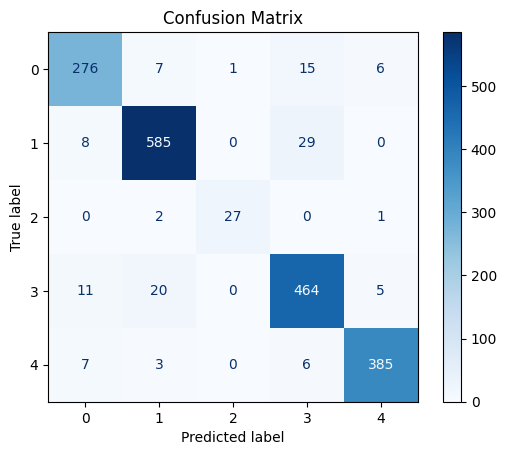

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


cm = confusion_matrix(y_test, y_pred)


disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_search.classes_)

# Plotting the confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


Trivial Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.17      0.19      0.18       305
           1       0.31      0.18      0.23       622
           2       0.02      0.30      0.04        30
           3       0.25      0.20      0.22       500
           4       0.18      0.16      0.17       401

    accuracy                           0.19      1858
   macro avg       0.19      0.21      0.17      1858
weighted avg       0.24      0.19      0.20      1858



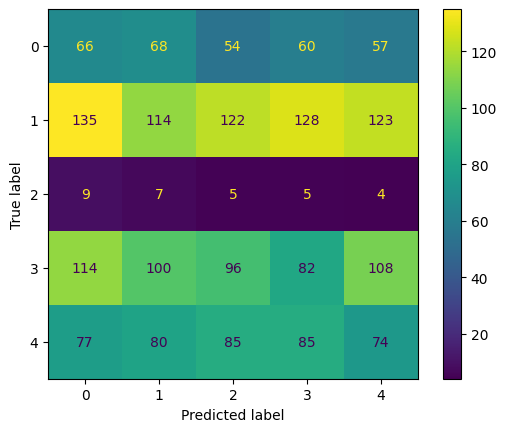

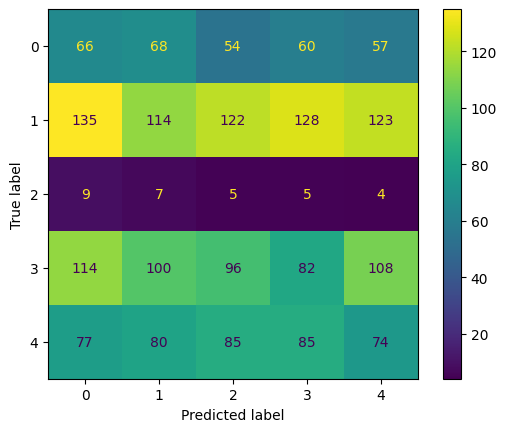

In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import ConfusionMatrixDisplay

trivial_clf = DummyClassifier(strategy="uniform")
trivial_clf.fit(X_train, y_train)
y_trivial = trivial_clf.predict(X_test)

print("Trivial Classifier Classification Report:")
print(classification_report(y_test, y_trivial))

# Confusion matrix display
cm_display = ConfusionMatrixDisplay.from_estimator(trivial_clf, X_test, y_test)
cm_display.plot()

In [ ]:
data=pd.read_csv("labelled_dataset.csv")

In [ ]:
data=data.drop(columns=["par_id"])

In [ ]:
# Check for missing values in the first 100 rows
missing_values_first_100 = data.head(100).isnull().sum()

# Print the missing values
print("Missing values in the first 100 rows:")
print(missing_values_first_100)


Missing values in the first 100 rows:
paragraph             0
has_entity            0
lexicon_count         0
difficult_words       1
last_editor_gender    0
category              0
text_clarity          0
dtype: int64


In [ ]:

average_difficult_words_first_100 = data['difficult_words'].head(100).mean()


data.loc[:100, 'difficult_words'] = data.loc[:100, 'difficult_words'].fillna(average_difficult_words_first_100)


missing_values_after_fill_first_100 = data.head(100).isnull().sum()
print("Missing values in the first 100 rows after filling:")
print(missing_values_after_fill_first_100)


Missing values in the first 100 rows after filling:
paragraph             0
has_entity            0
lexicon_count         0
difficult_words       0
last_editor_gender    0
category              0
text_clarity          0
dtype: int64


In [ ]:
print(data.duplicated())
data=data.drop_duplicates()

0       False
1       False
2       False
3       False
4       False
        ...  
9342    False
9343    False
9344    False
9345    False
9346    False
Length: 9347, dtype: bool


In [ ]:
len(data)

9105

In [ ]:
print(data.has_entity.value_counts())
print(data.category.value_counts())
print(data.text_clarity.value_counts())
print(data.last_editor_gender.value_counts())

ORG_YES_PRODUCT_NO_PERSON_YES_     2993
ORG_NO_PRODUCT_NO_PERSON_NO_       2777
ORG_YES_PRODUCT_NO_PERSON_NO_      1442
ORG_NO_PRODUCT_NO_PERSON_YES_      1347
ORG_YES_PRODUCT_YES_PERSON_YES_     292
ORG_YES_PRODUCT_YES_PERSON_NO_      124
ORG_NO_PRODUCT_YES_PERSON_YES_       64
ORG_NO_PRODUCT_YES_PERSON_NO_        42
data missing                         24
Name: has_entity, dtype: int64
biographies                             2882
philosophy                              2497
programming                             1933
artificial intelligence                 1523
movies about artificial intelligence     162
Philosophy                                13
Biographies                               13
Programming                               10
Artificial intelligence                   10
Movies about artificial intelligence       1
Name: category, dtype: int64
not_clear_enough    55
clear_enough        45
Name: text_clarity, dtype: int64
man                  6077
woman                2410

In [ ]:

data['category']=data["category"].str.lower()


In [ ]:

print(data.category.value_counts())
data.columns


biographies                             2895
philosophy                              2510
programming                             1943
artificial intelligence                 1533
movies about artificial intelligence     163
Name: category, dtype: int64


Index(['paragraph', 'has_entity', 'lexicon_count', 'difficult_words',
       'last_editor_gender', 'category', 'text_clarity'],
      dtype='object')

In [ ]:
y=data["text_clarity"]
X=data.drop(columns="text_clarity")

In [ ]:
X.head()
X=X.dropna()
print(y.isnull().sum())

9005


In [ ]:
print(X.columns)

Index(['paragraph', 'has_entity', 'lexicon_count', 'difficult_words',
       'last_editor_gender', 'category'],
      dtype='object')


In [ ]:
X["clean_text"]=X['paragraph'].apply(clean_text)

In [ ]:
import spacy
nlp = spacy.load('en_core_web_md')

In [ ]:
def process_text(text):
    doc = nlp(text)
    cleaned_list = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct and not token.is_space]
    cleaned_text = ' '.join(cleaned_list)
    return cleaned_text

In [ ]:
X['paragraph'] = X['clean_text'].apply(process_text)

In [ ]:
X = pd.get_dummies(X, columns=['last_editor_gender', 'category','has_entity'])

In [ ]:
X=X.drop(columns="clean_text")

In [ ]:
X.head()

,paragraph,lexicon_count,difficult_words,last_editor_gender_man,last_editor_gender_non-binary,last_editor_gender_prefer_not_to_say,last_editor_gender_woman,category_artificial intelligence,category_biographies,category_movies about artificial intelligence,...,category_programming,has_entity_ORG_NO_PRODUCT_NO_PERSON_NO_,has_entity_ORG_NO_PRODUCT_NO_PERSON_YES_,has_entity_ORG_NO_PRODUCT_YES_PERSON_NO_,has_entity_ORG_NO_PRODUCT_YES_PERSON_YES_,has_entity_ORG_YES_PRODUCT_NO_PERSON_NO_,has_entity_ORG_YES_PRODUCT_NO_PERSON_YES_,has_entity_ORG_YES_PRODUCT_YES_PERSON_NO_,has_entity_ORG_YES_PRODUCT_YES_PERSON_YES_,has_entity_data missing
0,ramsay bear glasgow 2 october 1852 nephew geol...,49,12.0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,widely estimate generation program resource de...,166,47.0,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,go win royal medal royal society 1971 copley m...,69,18.0,0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,change alter underlie assumption right thing r...,76,27.0,0,1,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
4,novel publish disraeli declare write turn atte...,200,47.0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
print("X length:",len(X))
print("y Length:",len(y))

X length: 9027
y Length: 9105


In [ ]:
y.name

'text_clarity'

In [ ]:

import string
EXTRA_PUNCT = string.punctuation


import spacy

nlp = spacy.load('en_core_web_md')



def get_spacy_doc_embedding(text_):

  doc_ = nlp(text_)
  return doc_.vector


def compute_avg_lemma_embedding(text_):
  doc_ = nlp(text_)
  avg_embedding = np.zeros_like(doc_.vector)
  token_counter = 0
  for token in doc_:
    if (token.is_stop or token.is_punct or token.is_digit or (token.lemma_ in EXTRA_PUNCT)):
      continue
    avg_embedding += token.vector
    token_counter+=1
  if token_counter>0:
    avg_embedding = avg_embedding/token_counter
  return avg_embedding




In [ ]:

from time import time as tt
t0 = tt()

df_train_emb = X['paragraph'].apply(lambda x: pd.Series(get_spacy_doc_embedding(x)))

df_processed = df_train_emb.join(X.drop(['paragraph'], axis=1))

df_processed.columns = df_processed.columns.astype(str)
print(f'Time elapsed is {(tt()-t0):.2f} seconds')

Time elapsed is 127.43 seconds


In [ ]:
df_processed.head()

,0,1,2,3,4,5,6,7,8,9,...,category_programming,has_entity_ORG_NO_PRODUCT_NO_PERSON_NO_,has_entity_ORG_NO_PRODUCT_NO_PERSON_YES_,has_entity_ORG_NO_PRODUCT_YES_PERSON_NO_,has_entity_ORG_NO_PRODUCT_YES_PERSON_YES_,has_entity_ORG_YES_PRODUCT_NO_PERSON_NO_,has_entity_ORG_YES_PRODUCT_NO_PERSON_YES_,has_entity_ORG_YES_PRODUCT_YES_PERSON_NO_,has_entity_ORG_YES_PRODUCT_YES_PERSON_YES_,has_entity_data missing
0,-2.023204,-2.021704,-0.048827,-0.252624,1.123793,-0.865731,1.175693,1.027408,0.725687,1.114677,...,0,0,0,0,0,0,1,0,0,0
1,-0.930449,0.050088,-1.836364,0.668067,2.835504,0.268440,0.950311,2.782065,-1.716951,-1.162670,...,0,0,0,0,0,1,0,0,0,0
2,-1.442611,-1.849719,0.839765,-0.186629,3.256159,-0.888691,0.439857,2.606478,0.101940,0.217788,...,0,0,0,0,0,1,0,0,0,0
3,-1.165983,-0.412904,0.021227,0.902887,2.995505,0.372968,1.779462,3.452548,-3.606672,-0.239312,...,1,0,0,1,0,0,0,0,0,0
4,-1.057206,-0.256406,-0.615421,0.061713,2.736242,-0.516344,1.494883,2.162182,-1.696022,-0.676508,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
print("X:",len(df_processed))
print("y:",len(y))

X: 9027
y: 9105


In [ ]:
y.value_counts()

not_clear_enough    55
clear_enough        45
Name: text_clarity, dtype: int64

In [ ]:
import pandas as pd


labeled_data = pd.concat([df_processed.iloc[:100], y.iloc[:100]], axis=1)


In [ ]:
import pandas as pd


nan_values = labeled_data.isna().sum()

print(nan_values)

0                                             0
1                                             0
2                                             0
3                                             0
4                                             0
                                             ..
has_entity_ORG_YES_PRODUCT_NO_PERSON_YES_     0
has_entity_ORG_YES_PRODUCT_YES_PERSON_NO_     0
has_entity_ORG_YES_PRODUCT_YES_PERSON_YES_    0
has_entity_data missing                       0
text_clarity                                  0
Length: 321, dtype: int64


In [ ]:
x_labeled = labeled_data.drop('text_clarity', axis=1)
y_labeled = labeled_data['text_clarity']
x_unlabeled = df_processed


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()


y_labeled = label_encoder.fit_transform(y_labeled)

In [ ]:
# y_labeled.value_counts()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV

X_labeled = pd.DataFrame(x_labeled)
y_labeled = pd.Series(y_labeled)
X_unlabeled = pd.DataFrame(x_unlabeled)


X_train, X_test, y_train, y_test = train_test_split(X_labeled, y_labeled, test_size=0.2, random_state=42)


In [ ]:
# Experimenting with Semi Supervised Learning but couldnt produce any good results with it
from sklearn.ensemble import RandomForestClassifier


model = RandomForestClassifier(n_estimators=100, random_state=42)


model.fit(X_train, y_train)

y_pred = model.predict(X_test)
initial_accuracy = accuracy_score(y_test, y_pred)
print(f'Initial Accuracy: {initial_accuracy}')


number_of_iterations = 5
confidence_threshold = 0.7


performance_history = [initial_accuracy]

for iteration in range(number_of_iterations):

    predicted_probabilities = model.predict_proba(X_unlabeled)
    high_confidence_indices = [i for i, prob in enumerate(predicted_probabilities.max(axis=1)) if prob > confidence_threshold]
    pseudo_labels = predicted_probabilities[high_confidence_indices].argmax(axis=1)


    X_pseudo_labeled = X_unlabeled.iloc[high_confidence_indices]


    X_combined = pd.concat([X_train, X_pseudo_labeled])
    y_combined = pd.concat([y_train, pd.Series(pseudo_labels, index=X_pseudo_labeled.index)])


    model.fit(X_combined, y_combined)


    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    performance_history.append(accuracy)


    print(f'Iteration {iteration + 1}: Accuracy = {accuracy}')

print("Performance history (Accuracy):", performance_history)


Initial Accuracy: 0.45
Iteration 1: Accuracy = 0.4
Iteration 2: Accuracy = 0.35
Iteration 3: Accuracy = 0.3
Iteration 4: Accuracy = 0.35
Iteration 5: Accuracy = 0.35
Performance history (Accuracy): [0.45, 0.4, 0.35, 0.3, 0.35, 0.35]


In [ ]:
from sklearn.ensemble import RandomForestClassifier


rf_model = RandomForestClassifier(n_estimators=100, random_state=42)


rf_model.fit(X_train, y_train)


y_pred_rf = rf_model.predict(X_test)


accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy_rf}')
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.45
              precision    recall  f1-score   support

           0       1.00      0.15      0.27        13
           1       0.39      1.00      0.56         7

    accuracy                           0.45        20
   macro avg       0.69      0.58      0.41        20
weighted avg       0.79      0.45      0.37        20



In [ ]:

param_grid = {
    'n_estimators': [20,30,50],  # Number of trees in the forest
    'max_features': ['auto'],  # Number of features to consider at every split
    'max_depth': [ 10, 20, 30],  # Maximum number of levels in tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required at each leaf node

}


grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)


grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best parameters set found on development set:")
print(grid_search.best_params_)

# Using the best model to make predictions
best_rf_model = grid_search.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test)


accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)
print(f'Best Random Forest Accuracy: {accuracy_best_rf}')
print(classification_report(y_test, y_pred_best_rf))


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters set found on development set:
{'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
Best Random Forest Accuracy: 0.5
              precision    recall  f1-score   support

           0       1.00      0.23      0.38        13
           1       0.41      1.00      0.58         7

    accuracy                           0.50        20
   macro avg       0.71      0.62      0.48        20
weighted avg       0.79      0.50      0.45        20



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [ ]:
from sklearn.svm import SVC


svm_model = SVC(kernel='rbf', probability=True, random_state=42)  # You can choose other kernels like 'rbf'

svm_model.fit(X_train, y_train)


y_pred_svm = svm_model.predict(X_test)


accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'SVM Accuracy: {accuracy_svm}')
print(classification_report(y_test, y_pred_svm))


SVM Accuracy: 0.35
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.35      1.00      0.52         7

    accuracy                           0.35        20
   macro avg       0.17      0.50      0.26        20
weighted avg       0.12      0.35      0.18        20



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC


param_grid = {
    'C': [0.1, 1, 10,100],  # Regularization parameter
    'kernel': ['linear'],  # Type of kernel
    'degree': [2, 3, 4,5,6],  # Degree of the polynomial kernel function (ignored by other kernels)
    'gamma': ['scale', 'auto'],  # Kernel coefficient
}


grid_search = GridSearchCV(SVC(probability=True, random_state=42), param_grid, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)


grid_search.fit(X_train, y_train)

print("Best parameters set found on development set:")
print(grid_search.best_params_)


best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)


accuracy_best = accuracy_score(y_test, y_pred_best)
print(f'Best SVM Accuracy: {accuracy_best}')
print(classification_report(y_test, y_pred_best))


Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best parameters set found on development set:
{'C': 0.1, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}
Best SVM Accuracy: 0.5
              precision    recall  f1-score   support

           0       0.62      0.62      0.62        13
           1       0.29      0.29      0.29         7

    accuracy                           0.50        20
   macro avg       0.45      0.45      0.45        20
weighted avg       0.50      0.50      0.50        20



In [ ]:
from sklearn.neighbors import KNeighborsClassifier


knn_model = KNeighborsClassifier(n_neighbors=5)


knn_model.fit(X_train, y_train)


y_pred_knn = knn_model.predict(X_test)


accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'KNN Accuracy: {accuracy_knn}')
print(classification_report(y_test, y_pred_knn))


KNN Accuracy: 0.45
              precision    recall  f1-score   support

           0       0.62      0.38      0.48        13
           1       0.33      0.57      0.42         7

    accuracy                           0.45        20
   macro avg       0.48      0.48      0.45        20
weighted avg       0.52      0.45      0.46        20



In [ ]:

param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Different values for the number of neighbors
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'metric': ['euclidean', 'manhattan', 'minkowski'],  # Distance metric for KNN
}


grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)


grid_search.fit(X_train, y_train)


print("Best parameters set found on development set:")
print(grid_search.best_params_)


best_knn_model = grid_search.best_estimator_
y_pred_best_knn = best_knn_model.predict(X_test)


accuracy_best_knn = accuracy_score(y_test, y_pred_best_knn)
print(f'Best KNN Accuracy: {accuracy_best_knn}')
print(classification_report(y_test, y_pred_best_knn))


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best parameters set found on development set:
{'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'uniform'}
Best KNN Accuracy: 0.4
              precision    recall  f1-score   support

           0       0.55      0.46      0.50        13
           1       0.22      0.29      0.25         7

    accuracy                           0.40        20
   macro avg       0.38      0.37      0.37        20
weighted avg       0.43      0.40      0.41        20



In [ ]:
from sklearn.linear_model import LogisticRegression


logreg_model = LogisticRegression(max_iter=1000)  # Increase max_iter if the model doesn't converge


logreg_model.fit(X_train, y_train)


y_pred_logreg = logreg_model.predict(X_test)


accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f'Logistic Regression Accuracy: {accuracy_logreg}')
print(classification_report(y_test, y_pred_logreg))


Logistic Regression Accuracy: 0.45
              precision    recall  f1-score   support

           0       0.58      0.54      0.56        13
           1       0.25      0.29      0.27         7

    accuracy                           0.45        20
   macro avg       0.42      0.41      0.41        20
weighted avg       0.47      0.45      0.46        20



In [ ]:

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],  # Algorithm to use in the optimization problem
    'penalty': ['l1', 'l2', 'elasticnet', 'none']  # Norm used in the penalization
}

# Adjust param_grid depending on the solver to avoid incompatible combinations
for params in param_grid['solver']:
    if params in ['liblinear', 'saga']:
        param_grid['penalty'] = [ 'l2']
    elif params in ['newton-cg', 'lbfgs', 'sag']:
        param_grid['penalty'] = ['l2', 'none']


grid_search = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42), param_grid, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)


grid_search.fit(X_train, y_train)


print("Best parameters set found on development set:")
print(grid_search.best_params_)


best_logreg_model = grid_search.best_estimator_
y_pred_best_logreg = best_logreg_model.predict(X_test)


accuracy_best_logreg = accuracy_score(y_test, y_pred_best_logreg)
print(f'Best Logistic Regression Accuracy: {accuracy_best_logreg}')
print(classification_report(y_test, y_pred_best_logreg))


Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best parameters set found on development set:
{'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Best Logistic Regression Accuracy: 0.4
              precision    recall  f1-score   support

           0       0.56      0.38      0.45        13
           1       0.27      0.43      0.33         7

    accuracy                           0.40        20
   macro avg       0.41      0.41      0.39        20
weighted avg       0.46      0.40      0.41        20



Baseline Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.35      1.00      0.52         7

    accuracy                           0.35        20
   macro avg       0.17      0.50      0.26        20
weighted avg       0.12      0.35      0.18        20



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


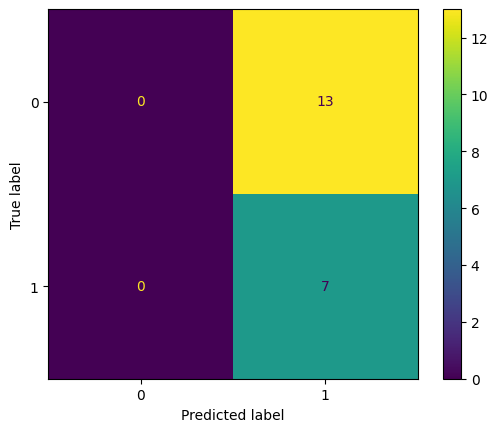

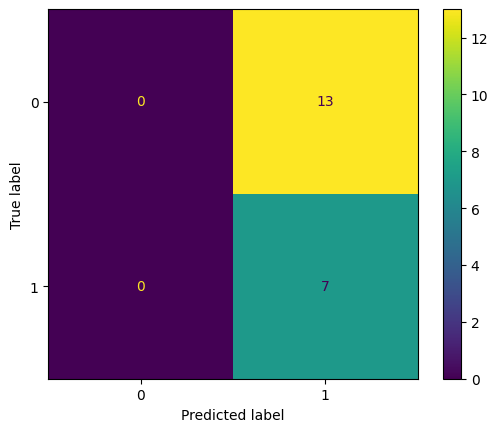

In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay


baseline_clf = DummyClassifier(strategy="most_frequent")
baseline_clf.fit(X_train, y_train)


y_baseline = baseline_clf.predict(X_test)


print("Baseline Classifier Classification Report:")
print(classification_report(y_test, y_baseline))


cm_display_baseline = ConfusionMatrixDisplay.from_estimator(baseline_clf, X_test, y_test)
cm_display_baseline.plot()
